# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

607

In [4]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,,PT,,,,,,
1,dikson,,RU,,,,,,
2,bengkulu,,ID,,,,,,
3,taolanaro,,MG,,,,,,
4,port alfred,,ZA,,,,,,
5,cortez,,US,,,,,,
6,punta arenas,,CL,,,,,,
7,busselton,,AU,,,,,,
8,hermanus,,ZA,,,,,,
9,bethel,,US,,,,,,


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
        
        count += 1
              
    except (KeyError,):
          print("City not found. Skipping....")
              
    if count == 51:
        count += 1
        count_set = 1
        time.sleep(60)
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 1 of Set 1 | Ribeira Grande
Processing Record 2 of Set 1 | Dikson
Processing Record 3 of Set 1 | Bengkulu
City not found. Skipping....
Processing Record 4 of Set 1 | Port Alfred
Processing Record 5 of Set 1 | Cortez
Processing Record 6 of Set 1 | Punta Arenas
Processing Record 7 of Set 1 | Busselton
Processing Record 8 of Set 1 | Hermanus
Processing Record 9 of Set 1 | Bethel
Processing Record 10 of Set 1 | Jamestown
Processing Record 11 of Set 1 | Sabha
Processing Record 12 of Set 1 | Rikitea
Processing Record 13 of Set 1 | Trapani
Processing Record 14 of Set 1 | Ushuaia
Processing Record 15 of Set 1 | Homer
Processing Record 16 of Set 1 | Kaitangata
Processing Record 17 of Set 1 | Gimli
Processing Record 18 of Set 1 | Saint-Pierre
Processing Record 19 of Set 1 | Vila Velha
Processing Record 21 of Set 1 | Port Elizabeth
Processing Record 22 of Set 1 | Barrow
Processing Record 23 of Set 1 | Saint George
City not found. 

Processing Record 183 of Set 1 | Komsomolskiy
Processing Record 184 of Set 1 | Vallenar
Processing Record 185 of Set 1 | Khatanga
Processing Record 186 of Set 1 | Leningradskiy
Processing Record 187 of Set 1 | Broome
Processing Record 188 of Set 1 | Yerbogachen
Processing Record 189 of Set 1 | Shenjiamen
Processing Record 190 of Set 1 | Trairi
Processing Record 191 of Set 1 | Borogontsy
Processing Record 192 of Set 1 | Mandan
Processing Record 193 of Set 1 | Lagunas
Processing Record 194 of Set 1 | Boa Vista
Processing Record 195 of Set 1 | Candolim
City not found. Skipping....
Processing Record 196 of Set 1 | Hobyo
City not found. Skipping....
Processing Record 197 of Set 1 | Heyang
Processing Record 198 of Set 1 | Tual
Processing Record 199 of Set 1 | Pisco
Processing Record 200 of Set 1 | Berlevag
Processing Record 201 of Set 1 | Carnarvon
Processing Record 202 of Set 1 | Shymkent
Processing Record 203 of Set 1 | Alice Springs
Processing Record 204 of Set 1 | Bertoua
City not found.

Processing Record 363 of Set 1 | Charyshskoye
City not found. Skipping....
Processing Record 364 of Set 1 | Dzilam Gonzalez
Processing Record 365 of Set 1 | Griffith
Processing Record 366 of Set 1 | Ducheng
Processing Record 367 of Set 1 | Santa Maria
Processing Record 368 of Set 1 | Cururupu
Processing Record 369 of Set 1 | Garden City
Processing Record 370 of Set 1 | Satellite Beach
Processing Record 371 of Set 1 | Menongue
Processing Record 372 of Set 1 | Mizque
Processing Record 373 of Set 1 | Huarmey
Processing Record 374 of Set 1 | Honiara
Processing Record 375 of Set 1 | Katima Mulilo
Processing Record 376 of Set 1 | Neryungri
Processing Record 377 of Set 1 | Ravar
Processing Record 378 of Set 1 | Mackay
Processing Record 379 of Set 1 | Tandil
City not found. Skipping....
Processing Record 380 of Set 1 | Smithers
Processing Record 381 of Set 1 | Port Macquarie
Processing Record 382 of Set 1 | Bundaberg
Processing Record 383 of Set 1 | Itarema
Processing Record 384 of Set 1 | Jun

Processing Record 546 of Set 1 | Djibouti
------------------------
 Data Retrieval Complete 
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [8]:
weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [9]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,78,PT,1580271745,94,38.52,-28.7,60.12,19.71
1,dikson,100,RU,1580271746,95,73.51,80.55,-18.06,14.38
2,bengkulu,100,ID,1580271514,94,-3.8,102.27,72.45,13.62
4,port alfred,60,ZA,1580271516,83,-33.59,26.89,68.00,4
5,cortez,1,US,1580271746,79,37.35,-108.59,26.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

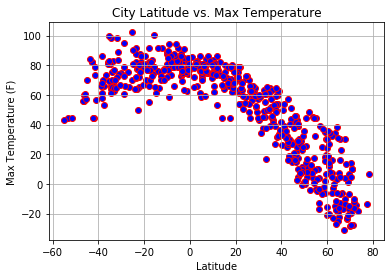

In [10]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

## Lat Vs Temp

The plot above is trying to establish a relationship between a city's latitude and the temperature of the area.

#### Latitude vs. Humidity Plot

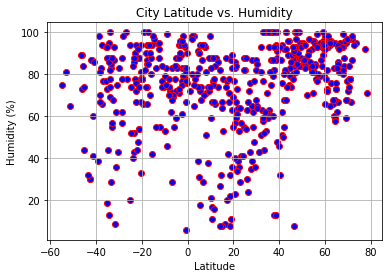

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

## Lat vs Humidity
This plot tries to establish a relationship between latitude and humidity of a city.

#### Latitude vs. Cloudiness Plot

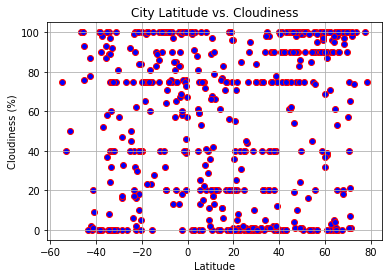

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

## Latitude vs cloudiness
Trying to establish a relationship between Latitude and cloudiness of a city.

#### Latitude vs. Wind Speed Plot

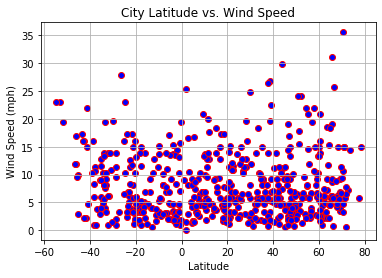

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Lat vs Wind speed
How is windspeed affected by latitude of a city?

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,ribeira grande,78,PT,1580271745,94,38.52,-28.7,60.12,19.71,Nothern Hemisphere
1,dikson,100,RU,1580271746,95,73.51,80.55,-18.06,14.38,Nothern Hemisphere
2,bengkulu,100,ID,1580271514,94,-3.8,102.27,72.45,13.62,Southern Hemisphere
4,port alfred,60,ZA,1580271516,83,-33.59,26.89,68.00,4,Southern Hemisphere
5,cortez,1,US,1580271746,79,37.35,-108.59,26.60,5.82,Nothern Hemisphere


In [16]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,ribeira grande,78,PT,1580271745,94,38.52,-28.7,60.12,19.71,Nothern Hemisphere
1,dikson,100,RU,1580271746,95,73.51,80.55,-18.06,14.38,Nothern Hemisphere
5,cortez,1,US,1580271746,79,37.35,-108.59,26.60,5.82,Nothern Hemisphere
9,bethel,90,US,1580271747,76,41.37,-73.41,37.00,4.7,Nothern Hemisphere
11,sabha,0,LY,1580271747,43,27.04,14.43,56.41,10.6,Nothern Hemisphere


In [17]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
2,bengkulu,100,ID,1580271514,94,-3.8,102.27,72.45,13.62,Southern Hemisphere
4,port alfred,60,ZA,1580271516,83,-33.59,26.89,68.00,4,Southern Hemisphere
6,punta arenas,40,CL,1580271489,81,-53.15,-70.92,44.60,23.04,Southern Hemisphere
7,busselton,32,AU,1580271485,29,-33.65,115.33,82.99,7.54,Southern Hemisphere
8,hermanus,89,ZA,1580271747,95,-34.42,19.23,64.00,5.01,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9004508503583407


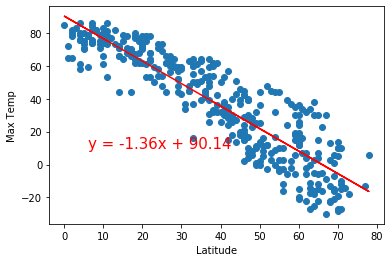

In [18]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Max Temp vs Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4262418343260367


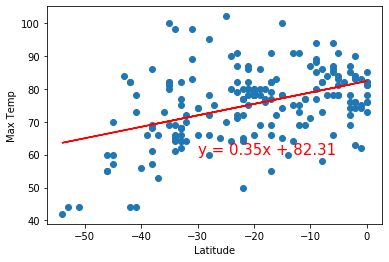

In [19]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Max Temp vs Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38072348147409435


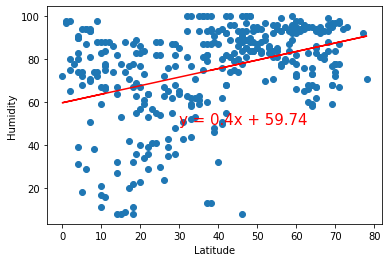

In [20]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16758684225352438


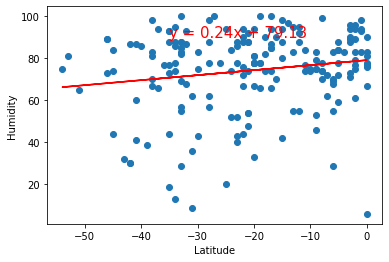

In [21]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3016034196840858


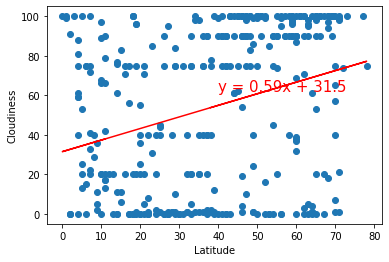

In [22]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Cloudiness(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1885173799593914


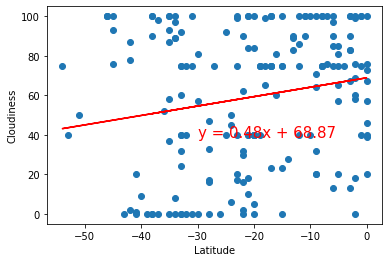

In [23]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Cloudiness (%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06724113033267362


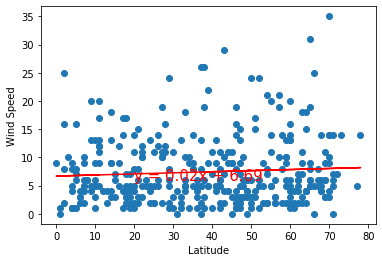

In [24]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29047146383554734


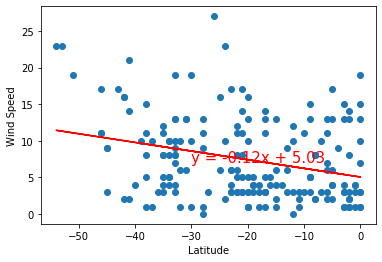

In [25]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Wind Speed (mph) vs Lat.png')
plt.show()